0 0 1 10461.807789808634
0 1 1 10461.807789808634
0 2 1 10461.807789808634
0 3 1 10461.807789808634
0 4 1 10461.807789808634
1 0 1 10485.335369875012
1 1 1 10213.069389282877
1 2 1 10109.086255226402
1 3 1 10196.937823592429
1 4 1 10293.13664598835
2 0 1 10331.920297638595
2 1 1 10261.023738607388
2 2 1 10282.043527634998
2 3 1 10022.09853141538
2 4 1 10251.742142484703
3 0 1 10332.773556520551
3 1 1 10226.09115148631
3 2 1 10293.590080018828
3 3 1 10358.428272178102
3 4 1 10523.950968880838
4 0 1 10533.706216896344
4 1 1 10251.107588534433
4 2 1 10254.931190535923
4 3 1 10397.972573247776


No handles with labels found to put in legend.


4 4 1 10187.392900921097


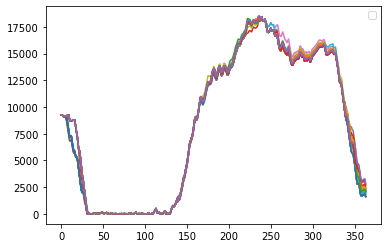

In [1]:
from os.path import exists
import matplotlib.pyplot as plt

first_stage__probs = (0.0, 0.25, 0.5, 0.75, 1.0)
second_stage__probs = (0.0, 0.25, 0.5, 0.75, 1.0)

for fp in range(5):
    for sp in range(5):
        scaling = 1
        x = []
        y = []

        filename = '/Users/wolframwiesemann/Desktop/energy/statistics_' + str(fp) + '_' + str(sp) + '_' + str(scaling) + '.txt'
        if not exists (filename):
            print (filename + ' does not exist')
            continue
            
        with open(filename) as f:
            lines = f.readlines()
        
        spot_revenues = 0.0
        reserve_up_revenues = 0.0
        reserve_down_revenues = 0.0
        first_round_success_up = 0.0
        first_round_success_down = 0.0
        second_round_freq_up = 0.0
        second_round_freq_down = 0.0
        curr_day = 0
        #success = 0
        
        while len(lines) > 0:
            day = lines.pop(0)
            violations = lines.pop(0)
            #success += int(lines.pop(0))
            water_levels = lines.pop(0).split(' ')
            water_values = lines.pop(0).split(' ')
            target_end_of_day_water_levels = lines.pop(0).split(' ')
            gen_pump_spill = lines.pop(0) # generation pump and spill throughout the day

            for i in range (24):
                market_data = lines.pop(0) # market data
                market_data = market_data.strip().replace ('  ', ' ').split(' ')
                
                spot_revenues += float(market_data[1])
                reserve_up_revenues += float(market_data[7])
                reserve_down_revenues += float(market_data[13])
                                
                first_round_success_up += float(market_data[3])
                second_round_freq_up += float(market_data[4])
                first_round_success_down += float(market_data[9])
                second_round_freq_down += float(market_data[10])
                                
            lines.pop(0) # end-of-day reservoir levels
            lines.pop(0) # empty line
        
            total_revenues_to_date = spot_revenues + reserve_up_revenues + reserve_down_revenues

            x += [ curr_day ]
            y += [ float(water_levels[0]) ]
            #y += [ float(water_values[0]) ]
            #y += [ total_revenues_to_date ]
            #y += [ second_round_freq_down ]
            curr_day = curr_day + 1

        print (fp, sp, scaling, total_revenues_to_date) #, spot_revenues, reserve_up_revenues, reserve_down_revenues)
        #print (fp, sp, first_round_success_up, first_round_success_down)
        #print (first_stage__probs[fp], second_stage__probs[sp], first_round_success_up  / (curr_day * 24.0), first_round_success_down  / (curr_day * 24.0), second_round_freq_up / (curr_day * 24.0), second_round_freq_down / (curr_day * 24.0))

        plt.plot (x, y)#, label = str(fp) + '-' + str(sp) + '-' + str(scaling))
plt.legend()
#plt.figure(figsize=(200,100))
plt.savefig ('/Users/wolframwiesemann/Desktop/scaling.pdf')
plt.show()